In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
results_moralexceptqa = pd.DataFrame(columns=["model", "chinese_reasoning", "chinese_prediction", "english_reasoning", "english_prediction", "german_reasoning", "german_prediction", "hindi_reasoning", "hindi_prediction", "spanish_reasoning", "spanish_prediction", "urdu_reasoning", "urdu_prediction"])

results_ethics_cs = pd.DataFrame(columns=["model", "chinese_reasoning", "chinese_prediction", "english_reasoning", "english_prediction", "german_reasoning", "german_prediction", "hindi_reasoning", "hindi_prediction", "spanish_reasoning", "spanish_prediction", "urdu_reasoning", "urdu_prediction"])
results_ethics_deo = pd.DataFrame(columns=["model", "chinese_reasoning", "chinese_prediction", "english_reasoning", "english_prediction", "german_reasoning", "german_prediction", "hindi_reasoning", "hindi_prediction", "spanish_reasoning", "spanish_prediction", "urdu_reasoning", "urdu_prediction"])
results_ethics_justice = pd.DataFrame(columns=["model", "chinese_reasoning", "chinese_prediction", "english_reasoning", "english_prediction", "german_reasoning", "german_prediction", "hindi_reasoning", "hindi_prediction", "spanish_reasoning", "spanish_prediction", "urdu_reasoning", "urdu_prediction"])
results_ethics_util = pd.DataFrame(columns=["model", "chinese_reasoning", "chinese_prediction", "english_reasoning", "english_prediction", "german_reasoning", "german_prediction", "hindi_reasoning", "hindi_prediction", "spanish_reasoning", "spanish_prediction", "urdu_reasoning", "urdu_prediction"])
results_ethics_virtue = pd.DataFrame(columns=["model", "chinese_reasoning", "chinese_prediction", "english_reasoning", "english_prediction", "german_reasoning", "german_prediction", "hindi_reasoning", "hindi_prediction", "spanish_reasoning", "spanish_prediction", "urdu_reasoning", "urdu_prediction"])

In [3]:
languages = ["chinese", "english", "german", "hindi", "spanish", "urdu"]
model_names = ["3_2", "3_1", "OLMo_2", "Phi", "Mistral", "Qwen2_5", "deepseek"]

In [4]:
def convert_to_string(value):
    if value is None:
        return ""
    if isinstance(value, dict):
        return ' '.join(str(v) for v in value.values() if v is not None)
    elif isinstance(value, list):
        return ' '.join(str(v) for v in value if v is not None)
    else:
        return str(value)

In [5]:
# MoralExceptQA
base_file_path = "/shared/2/projects/moral-project/MEQ_Results/"
reasoning = {model : {lang: [] for lang in languages} for model in model_names}
responses = {model : {lang: [] for lang in languages} for model in model_names}

for fname in os.listdir(base_file_path):
    if "metrics" in fname:
        continue

    if "scenario" in fname:
        lang = "english"
    else:
        for lang in languages:
            if lang.lower() in fname.lower():
                break
    if "OLMo-2" in fname:
        model = "OLMo_2"
    else:
        for model in model_names:
            if model.lower() in fname.lower():
                break
    
    with open(base_file_path+fname, "r") as f:
        data = json.load(f)

    parsed = [r for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
    try:
        instances = [r['scenario'] for r in parsed]
    except:
        instances = [r['question'] for r in parsed]
    predictions = [r["parsed_answer"] for r in parsed]
    references = [r["reference"] for r in parsed]
    reasons = [convert_to_string(r.get('thought_process', '')) + ". " + convert_to_string(r.get('reasoning', '')) for r in parsed]

    responses[model][lang] = predictions
    reasoning[model][lang] = reasons

for model in model_names:
    # "model", "chinese_reasoning", "chinese_prediction", "english_reasoning", "english_prediction", "hindi_reasoning", "hindi_prediction", "german_reasoning", "german_prediction", "spanish_reasoning", "spanish_prediction", "urdu_reasoning", "urdu_prediction"
    row = [model, reasoning[model]['chinese'], responses[model]["chinese"], reasoning[model]['english'], responses[model]["english"], reasoning[model]['german'], responses[model]["german"], reasoning[model]['hindi'], responses[model]["hindi"], reasoning[model]['spanish'], responses[model]["spanish"], reasoning[model]['urdu'], responses[model]["urdu"]]
    results_moralexceptqa.loc[len(results_moralexceptqa)] = row

In [6]:
# Ethics-CS
base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
responses = {model : {lang: [] for lang in languages} for model in model_names}
reasoning = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        if "cms" not in fname.lower() and "commonsense" not in fname.lower():
            continue

        if "commonsense" not in fname:
            if "scenario" in fname:
                lang = "english"
            else:
                for lang in languages:
                    if lang.lower() in fname.lower():
                        break
        else:
            for lang in languages:
                if lang.lower() in fname.lower():
                    break

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [r for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [r["reference"] for r in parsed]
        reasons = [convert_to_string(r.get('thought_process', '')) + ". " + convert_to_string(r.get('reasoning', '')) for r in parsed]

        responses[model][lang] = predictions
        reasoning[model][lang] = reasons

for model in model_names:
    row = [model, reasoning[model]['chinese'], responses[model]["chinese"], reasoning[model]['english'], responses[model]["english"], reasoning[model]['german'], responses[model]["german"], reasoning[model]['hindi'], responses[model]["hindi"], reasoning[model]['spanish'], responses[model]["spanish"], reasoning[model]['urdu'], responses[model]["urdu"]]
    results_ethics_cs.loc[len(results_ethics_cs)] = row

In [7]:
# Ethics-Deo
base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
responses = {model : {lang: [] for lang in languages} for model in model_names}
reasoning = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        if "den" not in fname.lower() and "deontology" not in fname.lower():
            continue

        if "deontology" not in fname:
            if "scenario" in fname:
                lang = "english"
            else:
                for lang in languages:
                    if lang.lower() in fname.lower():
                        break
        else:
            for lang in languages:
                if lang.lower() in fname.lower():
                    break

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [r for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [r["reference"] for r in parsed]
        reasons = [convert_to_string(r.get('thought_process', '')) + ". " + convert_to_string(r.get('reasoning', '')) for r in parsed]

        responses[model][lang] = predictions
        reasoning[model][lang] = reasons
        
for model in model_names:
    row = [model, reasoning[model]['chinese'], responses[model]["chinese"], reasoning[model]['english'], responses[model]["english"], reasoning[model]['german'], responses[model]["german"], reasoning[model]['hindi'], responses[model]["hindi"], reasoning[model]['spanish'], responses[model]["spanish"], reasoning[model]['urdu'], responses[model]["urdu"]]
    results_ethics_deo.loc[len(results_ethics_deo)] = row

In [8]:
# Ethics-justice
base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
responses = {model : {lang: [] for lang in languages} for model in model_names}
reasoning = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        if "justice" not in fname.lower():
            continue

        lang_found = False
        for lang in languages:
            if lang.lower() in fname.lower():
                lang_found = True
                break
        if not lang_found:
            lang = "english"

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [r for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [r["reference"] for r in parsed]
        reasons = [convert_to_string(r.get('thought_process', '')) + ". " + convert_to_string(r.get('reasoning', '')) for r in parsed]

        responses[model][lang] = predictions
        reasoning[model][lang] = reasons

for model in model_names:
    row = [model, reasoning[model]['chinese'], responses[model]["chinese"], reasoning[model]['english'], responses[model]["english"], reasoning[model]['german'], responses[model]["german"], reasoning[model]['hindi'], responses[model]["hindi"], reasoning[model]['spanish'], responses[model]["spanish"], reasoning[model]['urdu'], responses[model]["urdu"]]
    results_ethics_justice.loc[len(results_ethics_justice)] = row

In [9]:
# Ethics-util
base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
responses = {model : {lang: [] for lang in languages} for model in model_names}
reasoning = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        if "util" not in fname.lower() and "utilitarian" not in fname.lower():
            continue

        lang_found = False
        for lang in languages:
            if lang.lower() in fname.lower():
                lang_found = True
                break
        if not lang_found:
            lang = "english"

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [r for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [1] * len(parsed)
        reasons = [convert_to_string(r.get('thought_process', '')) + ". " + convert_to_string(r.get('reasoning', '')) for r in parsed]

        responses[model][lang] = predictions
        reasoning[model][lang] = reasons
       
for model in model_names:
    row = [model, reasoning[model]['chinese'], responses[model]["chinese"], reasoning[model]['english'], responses[model]["english"], reasoning[model]['german'], responses[model]["german"], reasoning[model]['hindi'], responses[model]["hindi"], reasoning[model]['spanish'], responses[model]["spanish"], reasoning[model]['urdu'], responses[model]["urdu"]]    
    results_ethics_util.loc[len(results_ethics_util)] = row

In [10]:
# Ethics-virtue
base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
responses = {model : {lang: [] for lang in languages} for model in model_names}
reasoning = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        if "virtue" not in fname.lower():
            continue

        lang_found = False
        for lang in languages:
            if lang.lower() in fname.lower():
                lang_found = True
                break
        if not lang_found:
            lang = "english"

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [r for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [1] * len(parsed)
        reasons = [convert_to_string(r.get('thought_process', '')) + ". " + convert_to_string(r.get('reasoning', '')) for r in parsed]

        responses[model][lang] = predictions
        reasoning[model][lang] = reasons

for model in model_names:
    row = [model, reasoning[model]['chinese'], responses[model]["chinese"], reasoning[model]['english'], responses[model]["english"], reasoning[model]['german'], responses[model]["german"], reasoning[model]['hindi'], responses[model]["hindi"], reasoning[model]['spanish'], responses[model]["spanish"], reasoning[model]['urdu'], responses[model]["urdu"]]    
    results_ethics_virtue.loc[len(results_ethics_virtue)] = row

In [11]:
all_df = [results_moralexceptqa, results_ethics_cs, results_ethics_deo, results_ethics_justice, results_ethics_util, results_ethics_virtue]

In [12]:
import pickle

def load_emfd_dict_from_pickle(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)
    
emfd_dict_english = load_emfd_dict_from_pickle("MoralDicts/emfd_dict_english_seamless.pkl")
emfd_dict_chinese = load_emfd_dict_from_pickle("MoralDicts/emfd_dict_chinese_seamless.pkl")
emfd_dict_german = load_emfd_dict_from_pickle("MoralDicts/emfd_dict_german_seamless.pkl")
emfd_dict_hindi = load_emfd_dict_from_pickle("MoralDicts/emfd_dict_hindi_seamless.pkl")
emfd_dict_spanish = load_emfd_dict_from_pickle("MoralDicts/emfd_dict_spanish_seamless.pkl")
emfd_dict_urdu = load_emfd_dict_from_pickle("MoralDicts/emfd_dict_urdu_seamless.pkl")

In [13]:
from collections import defaultdict
import jieba
import re
import nltk

def preprocess(text, lang='english'):
    sentences = re.split(r'[。！？!?\.\|।]+', text)
    tokens = []

    if lang == 'chinese':
        for sent in sentences:
            sent = sent.strip()
            if sent:
                tokens.append([x for x in jieba.cut(sent)])
    else:
        for sent in sentences:
            tokens.append(sent.lower().split())
    return tokens

def get_moral_scores_rich(text, emfd_dict, lang = "english"):
    if lang == 'chinese':
        lemmas = preprocess(text, lang='chinese')
    else:
        lemmas = preprocess(text)
    lemmas = [sent for sent in lemmas if sent]

    prob_scores = [defaultdict(float) for _ in range(len(lemmas))]

    for i,sent in enumerate(lemmas):
        for lemma in sent:
            if lemma in emfd_dict:
                for dim, val in emfd_dict[lemma].items():
                    if dim.endswith('_p'):
                        prob_scores[i][dim[:-2]] += val

    return prob_scores

In [14]:
lang_to_reasoning_col = {
    'english': 'english_reasoning',
    'chinese': 'chinese_reasoning',
    'german': 'german_reasoning',
    'hindi': 'hindi_reasoning',
    'spanish': 'spanish_reasoning',
    'urdu': 'urdu_reasoning'
}
lang_to_emfd_dict = {
    'english': emfd_dict_english,
    'chinese': emfd_dict_chinese,
    'german': emfd_dict_german,
    'hindi': emfd_dict_hindi,
    'spanish': emfd_dict_spanish,
    'urdu': emfd_dict_urdu
}

for df in all_df:
    for lang in lang_to_reasoning_col:
        reasoning_col = lang_to_reasoning_col[lang]
        emfd_dict = lang_to_emfd_dict[lang]
        emfd_scores_col = f"{lang}_emfd_scores"

        emfd_scores = []
        for reasoning_list in df[reasoning_col]:
            reasoning_scores = []
            for reasoning in reasoning_list:
                scores = get_moral_scores_rich(reasoning, emfd_dict, lang=lang)
                reasoning_scores.append(scores)
            emfd_scores.append(reasoning_scores)
        df[emfd_scores_col] = emfd_scores


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.105 seconds.
Prefix dict has been built successfully.


In [15]:
all_df[0]

,model,chinese_reasoning,chinese_prediction,english_reasoning,english_prediction,german_reasoning,german_prediction,hindi_reasoning,hindi_prediction,spanish_reasoning,spanish_prediction,urdu_reasoning,urdu_prediction,english_emfd_scores,chinese_emfd_scores,german_emfd_scores,hindi_emfd_scores,spanish_emfd_scores,urdu_emfd_scores
0,3_2,[首先，我们需要考虑到汉克拒绝陌生人的要求，这是他维护自己的权利和尊严的决定 但是，陌生人威...,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...",[The stranger's threat is a clear example of c...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",[Analyze die Situation: Ein Fremder hat ohne E...,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[अजनबी को घर पर ब्लीच डालने के लिए कहा गया, जो...","[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...",[Considerar la situación y el bienestar del hi...,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[اخلاق کی بنیاد پر، یہ بات غالب ہے کہ کسی بھی ...,"[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[{'care': 0.4473424725502203, 'fairness': 0.6...","[[{'care': 4.921611957028796, 'fairness': 4.52...","[[{'care': 0.0952380952380952, 'fairness': 0.2...","[[{'care': 1.7115657523428034, 'fairness': 2.4...","[[{'care': 0.6749721212776368, 'fairness': 0.7...","[[{'care': 2.775816095430534, 'fairness': 3.21..."
1,3_1,[首先，我需要考虑到汉克的儿子被杀死的后果，这是一个非常严重的事件，会给整个家庭带来巨大的痛...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[The stranger's request is a form of coercion,...","[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",[Analyse der Situation: Der Fremde macht eine ...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[अजनबी ने हंक को एक हजार डॉलर दिए और उसकी अनुम...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",[Analicé el escenario y consideré las siguient...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",[ہینک نے اجنبی کی درخواست کو پورا کیا، لیکن پہ...,"[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, ...","[[{'care': 0.935848567993313, 'fairness': 0.88...","[[{'care': 2.249513766032261, 'fairness': 1.48...","[[{'care': 0.2714293511739065, 'fairness': 0.3...","[[{'care': 0.889645463264865, 'fairness': 1.00...","[[{'care': 0.4796847793907495, 'fairness': 0.4...","[[{'care': 0.36579547815584773, 'fairness': 0...."
2,OLMo_2,[首先我考虑到社会心理学中的概念，比如社会影响力和社会规范，以及道德决策理论。陌生人赠送的钱...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[First, we assess the pressure Hank is under, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[Erste Schritt: Anwendung von Kohlberg’s Moral...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[शुरू में, परिस्थिति का वर्णन की जा रही है जहा...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[El protagonista Hank se encuentra en una situ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[نفسیاتی نظریہ کے تصور کو استعمال کرتے ہوئے، ا...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[{'care': 0.43546798029556644, 'fairness': 0....","[[{'care': 0.6415328530063931, 'fairness': 0.5...","[[{}, {}, {'care': 0.1799198643858837, 'fairne...","[[{'care': 0.698190220632081, 'fairness': 0.73...","[[{'care': 0.1333333333333333, 'fairness': 0.0...","[[{'care': 2.4582349494834776, 'fairness': 2.0..."
3,Phi,[Model did not return valid JSON.. 汉克的选择违背了保护生...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[Hank's dilemma involves choosing between ille...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[The scenario involves a person breaking windo...,"[0, 0, 1, 0]","[नैतिकता का मूल्यांकन करने के लिए, मैं नैतिक स...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",[. El problema es directo y no requiere ningún...,"[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, ...",[یہ منظرنامہ میں اجنبی اور ہینک دونوں کے کردار...,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, ...","[[{'care': 0.2836213991769546, 'fairness': 0.6...","[[{}, {'care': 0.763125649333662, 'fairness': ...","[[{'care': 0.2894736842105263, 'fairness': 0.2...","[[{'care': 0.6922333237766896, 'fairness': 1.0...","[[{'care': 0.2858885941644562, 'fairness': 0.2...","[[{'care': 1.10287902107

In [ ]:
import pandas as pd

languages = ['english', 'chinese', 'german', 'hindi', 'spanish', 'urdu']

moral_data = {lang: {'reasoning': [], 'reasoning_emfd': []} for lang in languages}
immoral_data = {lang: {'reasoning': [], 'reasoning_emfd': []} for lang in languages}

for df in all_df:
    for lang in languages:
        reasoning_col = f"{lang}_reasoning"
        response_col = f"{lang}_prediction" if f"{lang}_prediction" in df.columns else f"{lang}_response"
        emfd_scores_col = f"{lang}_emfd_scores"
        for idx, row in df.iterrows():
            reasonings = row[reasoning_col]
            responses = row[response_col]
            emfd_scores = row[emfd_scores_col]
            for i, resp in enumerate(responses):
                if i >= len(reasonings) or i >= len(emfd_scores):
                    continue
                reasoning = reasonings[i]
                emfd = emfd_scores[i]
                if resp == 1:
                    moral_data[lang]['reasoning'].append(reasoning)
                    moral_data[lang]['reasoning_emfd'].append(emfd)
                elif resp == 0:
                    immoral_data[lang]['reasoning'].append(reasoning)
                    immoral_data[lang]['reasoning_emfd'].append(emfd)

moral_df = pd.DataFrame({
    'language': languages,
    'reasoning': [moral_data[lang]['reasoning'] for lang in languages],
    'reasoning_emfd': [moral_data[lang]['reasoning_emfd'] for lang in languages]
})

immoral_df = pd.DataFrame({
    'language': languages,
    'reasoning': [immoral_data[lang]['reasoning'] for lang in languages],
    'reasoning_emfd': [immoral_data[lang]['reasoning_emfd'] for lang in languages]
})


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

moral_dimensions = ['care', 'authority', 'fairness', 'loyalty', 'sanctity']

def prepare_long_data(df, response_type):
    records = []
    for _, row in df.iterrows():
        lang = row['language']
        all_reasonings = row['reasoning_emfd']
        
        for reasoning in all_reasonings:
            for step_idx, step_dict in enumerate(reasoning, 1): 
                for dim in moral_dimensions:
                    score = step_dict.get(dim, None)
                    if score is not None:
                        records.append({
                            'language': lang,
                            'step': step_idx,
                            'dimension': dim,
                            'score': score,
                            'response_type': response_type
                        })
    return pd.DataFrame(records)

moral_long = prepare_long_data(moral_df, 'moral')
immoral_long = prepare_long_data(immoral_df, 'immoral')

In [20]:
df = pd.concat([moral_long, immoral_long], ignore_index=True)
df_filtered = df[df['step'] <= 30].copy()
df_filtered = df_filtered.reset_index(drop=True)

In [21]:
agg_df = df_filtered.groupby(
    ['language', 'step', 'dimension', 'response_type'], 
    as_index=False
)['score'].mean()
agg_df.shape

(1600, 5)

/tmp/ipykernel_3165556/344310800.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_norm = df.groupby(['language', 'dimension']).apply(min_max_scale).reset_index(drop=True)


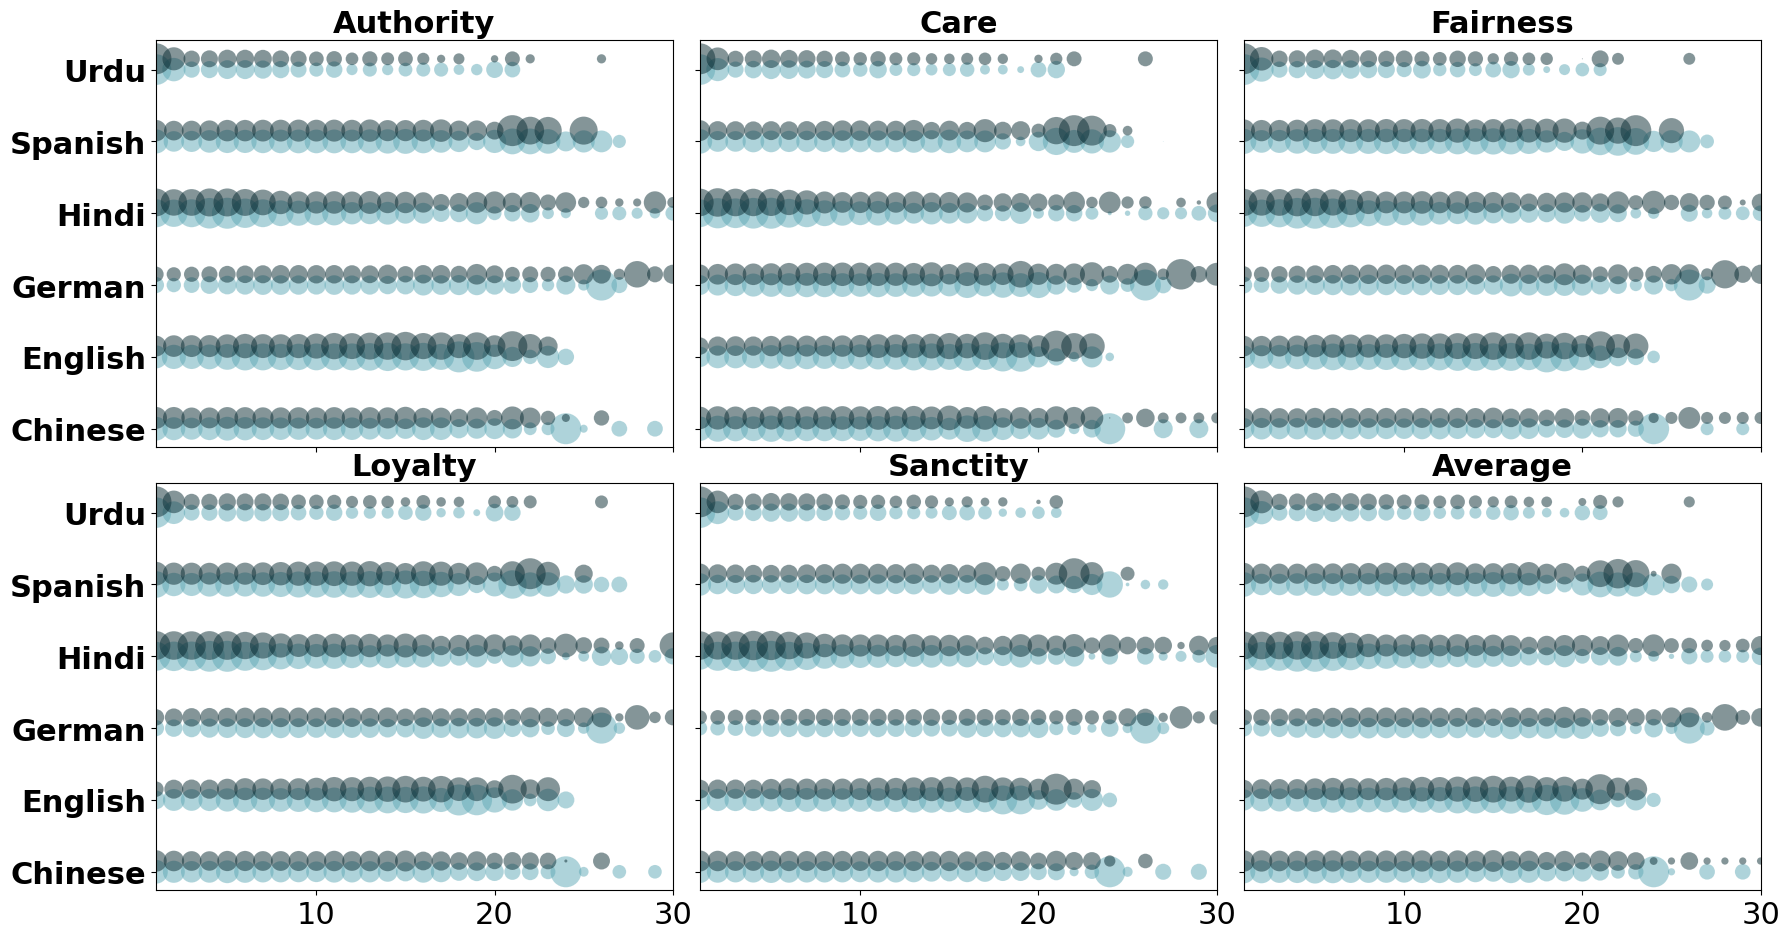

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df = agg_df

def min_max_scale(group):
    min_score = group['score'].min()
    max_score = group['score'].max()
    if min_score == max_score:
        group['score_norm'] = 0.5
    else:
        group['score_norm'] = (group['score'] - min_score) / (max_score - min_score)
    return group

df_norm = df.groupby(['language', 'dimension']).apply(min_max_scale).reset_index(drop=True)
df_avg = (
    df_norm.groupby(['language', 'step', 'response_type'], as_index=False)
    .agg({'score_norm': 'mean'})
)
df_avg['dimension'] = 'average'

df_plot = pd.concat([df_norm, df_avg], ignore_index=True)

all_dims = sorted(df_norm['dimension'].unique())
plot_dims = all_dims + ['average']
languages = sorted(df_norm['language'].unique())
num_dims = len(plot_dims)

title_fontsize = 22
label_fontsize = 12
tick_fontsize = 22
legend_fontsize = 22

fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
axs = axs.flatten()

for i, dim in enumerate(plot_dims):
    ax = axs[i]
    df_dim = df_plot[df_plot['dimension'] == dim]

    lang_to_num = {lang: idx for idx, lang in enumerate(languages)}
    y_vals = df_dim['language'].map(lang_to_num)

    offset = 0.15

    df_moral = df_dim[df_dim['response_type'] == 'moral']
    x_moral = df_moral['step']
    y_moral = df_moral['language'].map(lang_to_num)
    sizes_moral = df_moral['score_norm'] * 500

    df_immoral = df_dim[df_dim['response_type'] == 'immoral']
    x_immoral = df_immoral['step']
    y_immoral = df_immoral['language'].map(lang_to_num) + offset
    sizes_immoral = df_immoral['score_norm'] * 500

    ax.scatter(x_moral, y_moral, s=sizes_moral, c='#5FA9B6', alpha=0.5,
               edgecolors='w', linewidth=0.1, label='Permissible')
    ax.scatter(x_immoral, y_immoral, s=sizes_immoral, c='#0A2C33', alpha=0.5,
               edgecolors='w', linewidth=0.1, label='Not Permissible')

    if dim == 'average':
        ax.set_title("Average", fontsize=title_fontsize, fontweight='bold')
    else:
        ax.set_title(dim.capitalize(), fontsize=title_fontsize, fontweight='bold')
    if i % 3 == 0:
        ax.set_ylabel("", fontsize=label_fontsize)
    else:
        ax.set_ylabel("", fontsize=label_fontsize)

    ax.set_yticks(range(len(languages)))
    ax.set_yticklabels([lang.capitalize() for lang in languages], fontsize=tick_fontsize, fontweight='bold')
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.invert_yaxis() 

    min_step = df_plot['step'].min()
    max_step = df_plot['step'].max()
    ax.set_xlim(min_step, max_step)

for j in range(num_dims, len(axs)):
    fig.delaxes(axs[j])

for size in [0.2, 0.5, 1.0]:
    axs[4].scatter([], [], s=size*200, c='gray', alpha=0.6, label=f'{size:.1f}')
bubble_legend = axs[4].legend(
    scatterpoints=1, frameon=True, labelspacing=1, title='', ncol=5,
    loc='lower center', bbox_to_anchor=(0.28, -0.32), fontsize=legend_fontsize
)
axs[4].add_artist(bubble_legend)

# legend1 = mpatches.Patch(color='#5FA9B6', label='Permissible')
# legend2 = mpatches.Patch(color='#0A2C33', label='Not Permissible')
# plt.legend(handles=[legend1, legend2], title='', loc='lower right', fontsize=22, ncols=1)

plt.tight_layout(rect=[0, 0.05, 1, 1], w_pad=0.2, h_pad=0.0)
plt.savefig("FinalPlots/reasoning_values.pdf", bbox_inches='tight')


/tmp/ipykernel_3165556/1872972841.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_norm = df.groupby(['language', 'dimension']).apply(min_max_scale).reset_index(drop=True)
/tmp/ipykernel_3165556/1872972841.py:89: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.9, 1, 1], w_pad=0.2, h_pad=0.0)


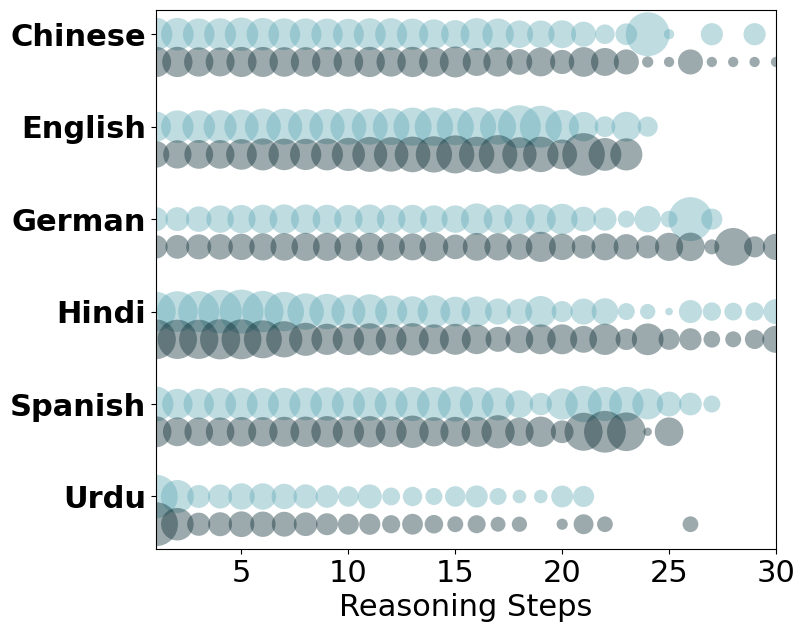

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df = agg_df

def min_max_scale(group):
    min_score = group['score'].min()
    max_score = group['score'].max()
    if min_score == max_score:
        group['score_norm'] = 0.5
    else:
        group['score_norm'] = (group['score'] - min_score) / (max_score - min_score)
    return group

df_norm = df.groupby(['language', 'dimension']).apply(min_max_scale).reset_index(drop=True)

df_avg = (
    df_norm.groupby(['language', 'step', 'response_type'], as_index=False)
    .agg({'score_norm': 'mean'})
)
df_avg['dimension'] = 'average'

df_plot = df_avg.copy()

languages = sorted(df_norm['language'].unique())

title_fontsize = 22
label_fontsize = 22
tick_fontsize = 22
legend_fontsize = 22

fig, ax = plt.subplots(figsize=(8, 7))

lang_to_num = {lang: idx for idx, lang in enumerate(languages)}
offset = 0.3

df_moral = df_plot[df_plot['response_type'] == 'moral']
x_moral = df_moral['step']
y_moral = df_moral['language'].map(lang_to_num)
sizes_moral = df_moral['score_norm'] * 1000

df_immoral = df_plot[df_plot['response_type'] == 'immoral']
x_immoral = df_immoral['step']
y_immoral = df_immoral['language'].map(lang_to_num) + offset
sizes_immoral = df_immoral['score_norm'] * 1000

ax.scatter(x_moral, y_moral, s=sizes_moral, c='#5FA9B6', alpha=0.4,
           edgecolors='w', linewidth=0.0, label='Permissible')
ax.scatter(x_immoral, y_immoral, s=sizes_immoral, c='#0A2C33', alpha=0.4,
           edgecolors='w', linewidth=0.0, label='Not Permissible')

ax.set_ylabel("", fontsize=label_fontsize)
ax.set_xlabel("Reasoning Steps", fontsize=label_fontsize)
ax.set_yticks(range(len(languages)))
ax.set_yticklabels([lang.capitalize() for lang in languages], fontsize=tick_fontsize, fontweight='bold')
ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.invert_yaxis() 

min_step = df_plot['step'].min()
max_step = df_plot['step'].max()
ax.set_xlim(min_step, max_step)

# for size in [0.2, 1.0]:
#     ax.scatter([], [], s=size*200, c='gray', alpha=0.6, label=f'{size:.1f}')
# bubble_legend = ax.legend(
#     scatterpoints=1, frameon=True, labelspacing=1, title='', ncol=5,
#     loc='lower center', bbox_to_anchor=(0.5, -0.32), fontsize=legend_fontsize
# )
# ax.add_artist(bubble_legend)

legend1 = mpatches.Patch(color='#5FA9B6', label='Moral')
legend2 = mpatches.Patch(color='#0A2C33', label='Immoral')
ax.legend(handles=[legend1, legend2], title='', loc='lower center', bbox_to_anchor=(0.5, -0.28), fontsize=legend_fontsize, ncols=2)

plt.tight_layout(rect=[0, 0.05, 1, 1], w_pad=0.2, h_pad=0.0)

plt.savefig("FinalPlots/reasoning_values_average.pdf", bbox_inches='tight')
